In [ ]:
## Start from this Cell
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from pandas import read_excel
data=pd.read_csv('/content/drive/MyDrive/nlp bio informatics/final_rediology_data.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data.head()

,fulltext,label
0,The cardiomediastinal silhouette appears irreg...,abnormal
1,Stable cardiomegaly. Improved aeration in the ...,abnormal
2,2 views of the chest demonstrate sternotomy a...,abnormal
3,"The heart, pulmonary and mediastinum are with...",abnormal
4,Stable appearance of aortic valve prosthesis. ...,abnormal


In [ ]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,fulltext,label
0,The cardiomediastinal silhouette appears irreg...,abnormal
1,Stable cardiomegaly. Improved aeration in the ...,abnormal
2,2 views of the chest demonstrate sternotomy a...,abnormal
3,"The heart, pulmonary and mediastinum are with...",abnormal
4,Stable appearance of aortic valve prosthesis. ...,abnormal
...,...,...
3949,The cardiac and mediastinal silhouettes are no...,abnormal
3950,Clear lungs bilaterally. Normal cardiac contou...,normal
3951,Heart size normal. Lungs clear. Stable 5 mm ca...,abnormal
3952,The cardiac and mediastinal silhouettes are un...,abnormal


In [ ]:

features = data.iloc[:, 0].values
labels = data.iloc[:, -1].values

In [ ]:
data.head()

,fulltext,label
0,The cardiomediastinal silhouette appears irreg...,abnormal
1,Stable cardiomegaly. Improved aeration in the ...,abnormal
2,2 views of the chest demonstrate sternotomy a...,abnormal
3,"The heart, pulmonary and mediastinum are with...",abnormal
4,Stable appearance of aortic valve prosthesis. ...,abnormal


In [ ]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [ ]:
data.head()

,fulltext,label
0,The cardiomediastinal silhouette appears irreg...,abnormal
1,Stable cardiomegaly. Improved aeration in the ...,abnormal
2,2 views of the chest demonstrate sternotomy a...,abnormal
3,"The heart, pulmonary and mediastinum are with...",abnormal
4,Stable appearance of aortic valve prosthesis. ...,abnormal


In [ ]:
from sklearn.preprocessing import LabelEncoder
reviews = processed_features
labels = data['label'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [ ]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, test_size=0.2, random_state=0)


In [ ]:
from keras.utils import pad_sequences

# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import keras
# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 200, 100)          300000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              84480     
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 24)                3096      
                                                                 
 dense_11 (Dense)            (None, 1)                 25        
                                                                 
Total params: 387,601
Trainable params: 387,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(train_padded, train_labels,
                    epochs=num_epochs, verbose=1)

Epoch 1/10
80/80 [==============================] - 23s 143ms/step - loss: 0.3989 - accuracy: 0.8406
Epoch 2/10
80/80 [==============================] - 7s 84ms/step - loss: 0.1696 - accuracy: 0.9467
Epoch 3/10
80/80 [==============================] - 4s 48ms/step - loss: 0.1205 - accuracy: 0.9625
Epoch 4/10
80/80 [==============================] - 4s 53ms/step - loss: 0.1104 - accuracy: 0.9669
Epoch 5/10
80/80 [==============================] - 3s 43ms/step - loss: 0.0909 - accuracy: 0.9751
Epoch 6/10
80/80 [==============================] - 2s 25ms/step - loss: 0.0642 - accuracy: 0.9822
Epoch 7/10
80/80 [==============================] - 2s 30ms/step - loss: 0.0532 - accuracy: 0.9870
Epoch 8/10
80/80 [==============================] - 2s 22ms/step - loss: 0.0555 - accuracy: 0.9858
Epoch 9/10
80/80 [==============================] - 2s 21ms/step - loss: 0.0458 - accuracy: 0.9882
Epoch 10/10
80/80 [==============================] - 3s 40ms/step - loss: 0.0418 - accuracy: 0.9890


In [ ]:
prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))

20/20 [==============================] - 1s 11ms/step
Accuracy of prediction on test set :  0.9511041009463722


In [ ]:
print(classification_report(test_labels,pred_labels))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       487
           1       0.93      0.85      0.89       147

    accuracy                           0.95       634
   macro avg       0.94      0.92      0.93       634
weighted avg       0.95      0.95      0.95       634



In [ ]:
print(confusion_matrix(test_labels,pred_labels))


[[478   9]
 [ 22 125]]


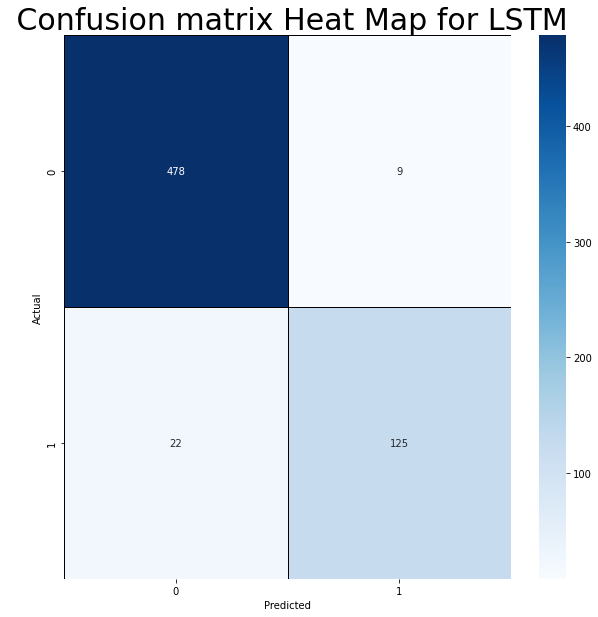

In [ ]:
import seaborn as sn
from sklearn import metrics
cm = metrics.confusion_matrix(test_labels,pred_labels)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
sn.set(font_scale=2.5)

plt.ylabel("Actual")
plt.title(" Confusion matrix Heat Map for LSTM")

cm = metrics.confusion_matrix(test_labels,pred_labels)
sn.set(font_scale=2.5)

In [ ]:
data.head()

,fulltext,label
0,The cardiomediastinal silhouette appears irreg...,abnormal
1,Stable cardiomegaly. Improved aeration in the ...,abnormal
2,2 views of the chest demonstrate sternotomy a...,abnormal
3,"The heart, pulmonary and mediastinum are with...",abnormal
4,Stable appearance of aortic valve prosthesis. ...,abnormal
